# 12 Morphology

http://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html

Test images

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage import io, data, morphology, color
from scipy import ndimage as ndi

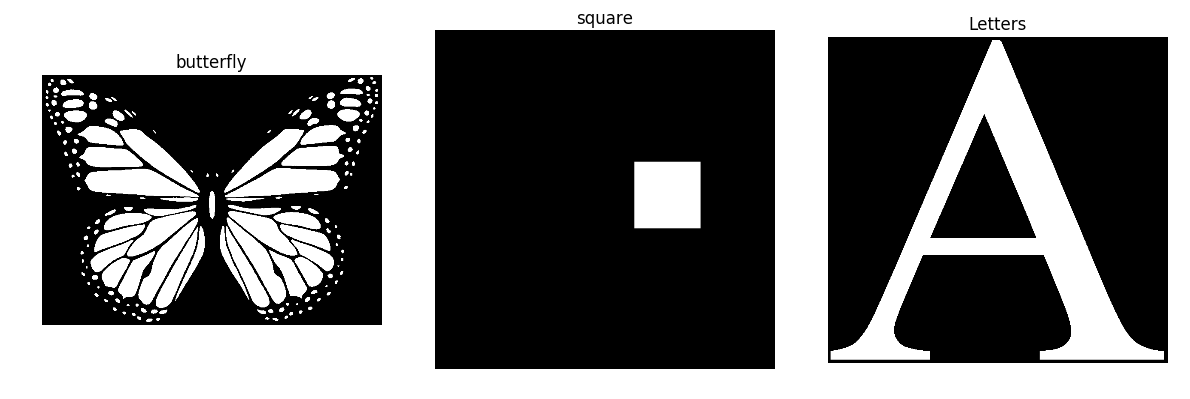

In [8]:
imTitles = ["butterfly", "square", "Letters"]

images = []
# load butterfly
im = io.imread("butterfly.png", as_grey=True)
im = im>0
images.append(im)

# load square
foo = np.zeros((256,256))
foo[100:150,150:200] = 1
foo = foo>0
images.append(foo)

# load letters
im = io.imread("tree.png", as_grey=True)
im = np.logical_not(im>0)
images.append(im)

fig, axes = plt.subplots(1, len(images), figsize=(12,4))
for im, ax, imTitle in zip(images, axes, imTitles):
    ax.imshow(im, cmap=cm.gray)
    ax.set_axis_off()
    ax.set_title(imTitle)
    
fig.tight_layout()
plt.show()

## 12.1.2 Basic Morphological operations using skimage

The basic morphological operations are erosion and dilation.

**Erosion**
Erosion sets a pixel to the *minimum* over all pixels in the neighborhood (centered at (i,j)). Erosion *shrinks* bright regions and *enlarges* dark regions

**Dilation**
Dilation sets a pixel to the *maximum* over all pixels in the neighborhood (centered at (i,j)). Dilation *enlarges* bright regions and *shrinks* dark regions

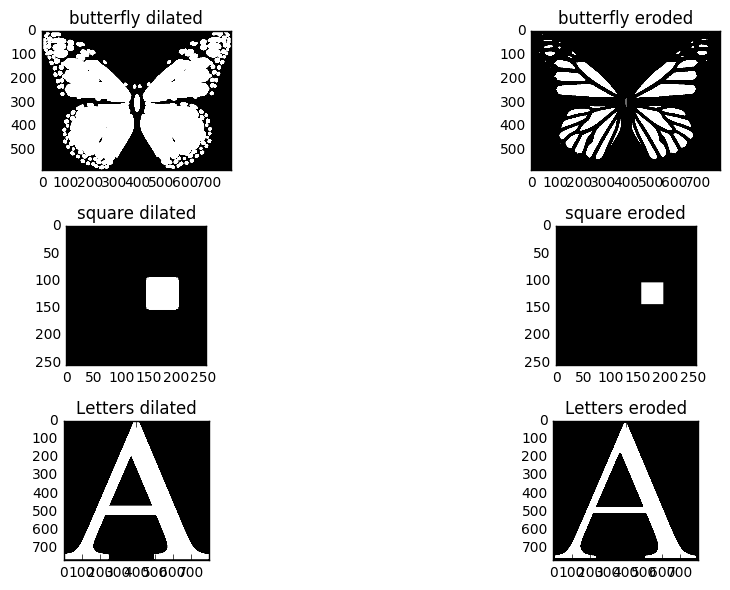

In [12]:
fig, axes= plt.subplots(len(images), 2, figsize=(12,6))
   
def dilate_erode_plot(im, selems, axes):
    '''quick function to dilate and erode a binary image and plot it into the given axes'''
    selem_erode, selem_dilate = selems
    ax_dilate, ax_erode = axes
    ax_dilate.imshow(morphology.binary_dilation(im,selem=selem_erode), cmap=cm.gray)
    ax.set_axis_off()
    
    ax_erode.imshow(morphology.binary_erosion(im,selem=selem_dilate), cmap=cm.gray)
    ax.set_axis_off
    
    return ax_dilate, ax_erode

selem_erode = morphology.disk(5)
selem_dilate = morphology.disk(5)
        
for k in range(len(images)):
    im = images[k]
    ax_dilate, ax_erode = dilate_erode_plot(im, (selem_erode, selem_dilate), axes[k,:])
    
    ax_dilate.set_title(imTitles[k] + " dilated")
    ax_erode.set_title(imTitles[k] + " eroded")
    
fig.tight_layout()
plt.show()

## Properties of Erosion $G \ominus S$

1. The erosion using an "impulse", e.g. $x_0=$np.array([[0,0,0],[0,0,1],[0,0,0]) (only a single 1 and the rest zeros) coresponds to the shift of the pointset $G$ by the vector $x_0$.
\begin{align}
G \ominus \left\{ x_0 \right\} = (G)_{-x_0}
\end{align}

2. The structuring element ${0}$ that contains only the origin is the neutral element of the erosion.
\begin{align}
G \ominus{0} = G
\end{align}

3. The eroded point set is contained in the original point set if the structuring element contains the origin:
\begin{align}
(0,0)^{\mathrm{T}} \in S \Rightarrow G \ominus S \subseteq G.
\end{align}

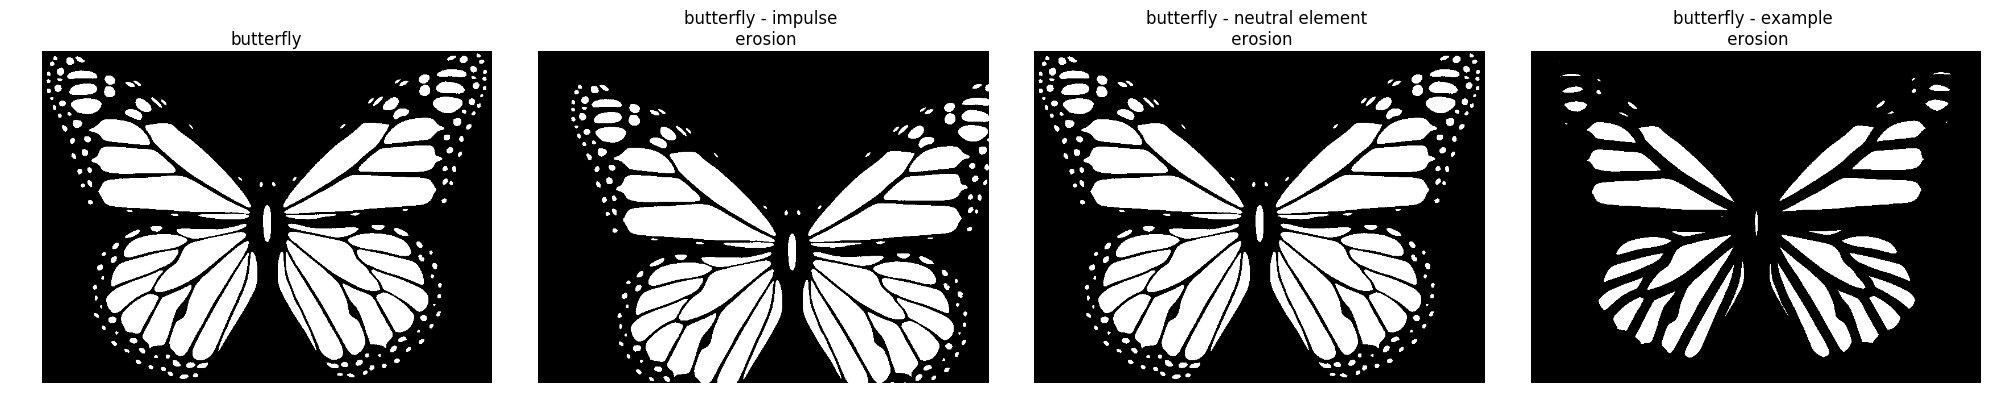

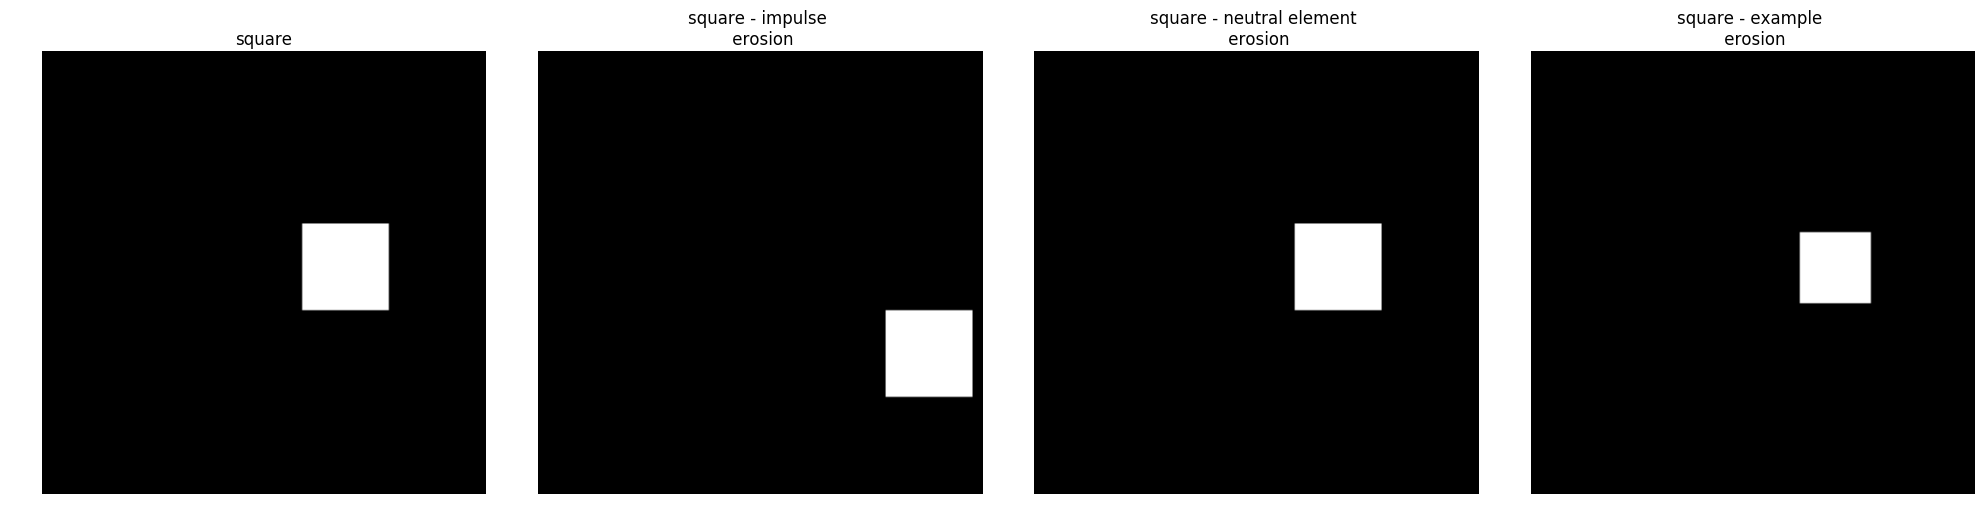

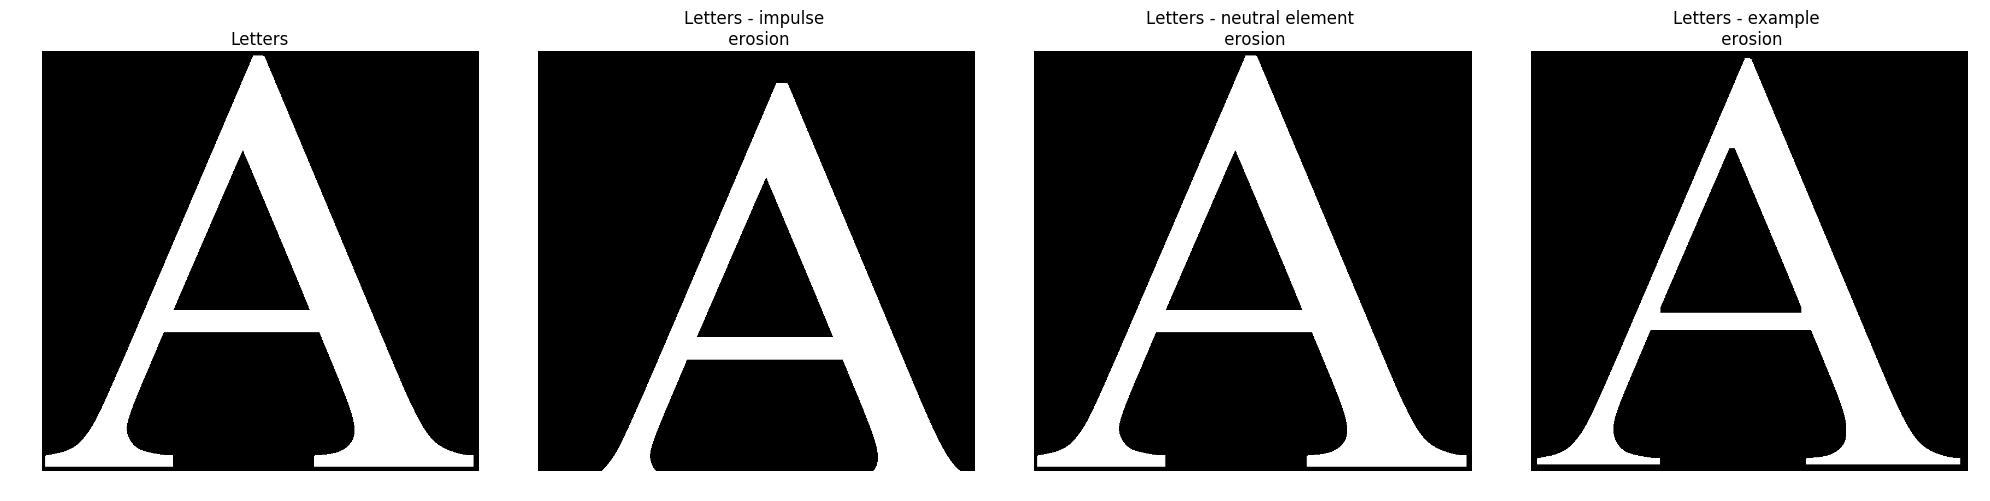

In [4]:
selems = []
s = np.zeros((101,101))
s[0,0] = 1
selems.append( s )   # 1. impulse
selems.append( np.array([[0,0,0],[0,1,0],[0,0,0]]) )   # 2. neutral element
selems.append( morphology.square(10) )   # 3. example

titles = ["impulse \n erosion", "neutral element \n erosion", "example \n erosion"]

for image, imTitle in zip(images,imTitles):
    fig,axes = plt.subplots(1,4, figsize=(20,6))
    axes = axes.ravel()
    axes[0].imshow(image, cmap=cm.gray)
    axes[0].set_axis_off()
    axes[0].set_title(imTitle)    
    for selem, ax, title in zip(selems, axes[1:], titles):
        ax.imshow(morphology.binary_erosion(image, selem=selem), cmap=cm.gray)
        ax.set_axis_off()
        ax.set_title(imTitle + " - " + title)
    fig.tight_layout()
    plt.show()    

## Properties of Dilation $G \oplus S$

1. The dilation of a single-element point set $G = \left\{ x_0 \right\}$ using the structuring element S corresponds to the shift of the structuring element by the vector $x_0$.
\begin{align}
\left\{ x_0 \right\} \oplus S = (S)_{x_0}
\end{align}

2. The structuring element ${0}$ that contains only the origin is the neutral element of the dilation.
\begin{align}
G \oplus{0} = G
\end{align}

4. Dilation is commutative.

5. Dilation is shift invariant

3. The dilated point set is contained in the original point set if the structuring element contains the origin:
\begin{align}
(0,0)^{\mathrm{T}} \in S \Rightarrow G \oplus S \subseteq G.
\end{align}

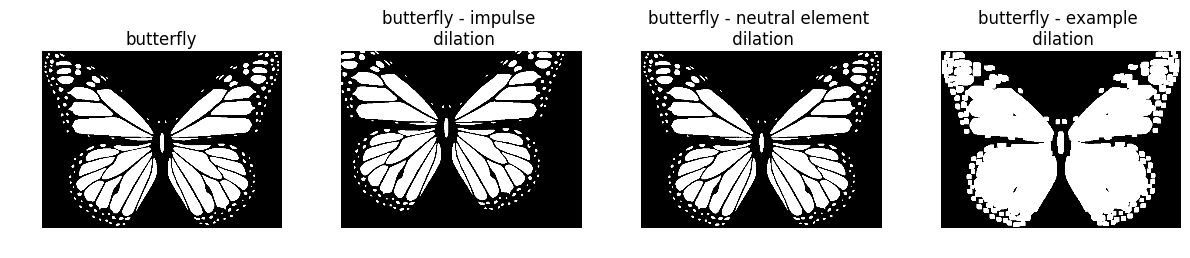

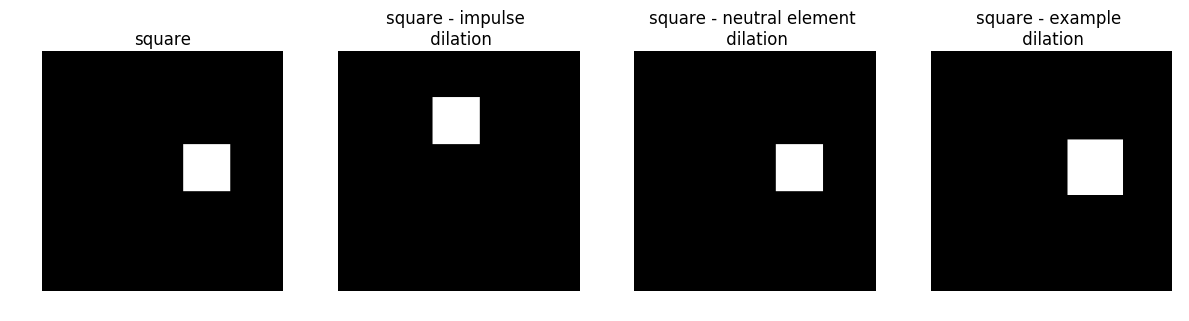

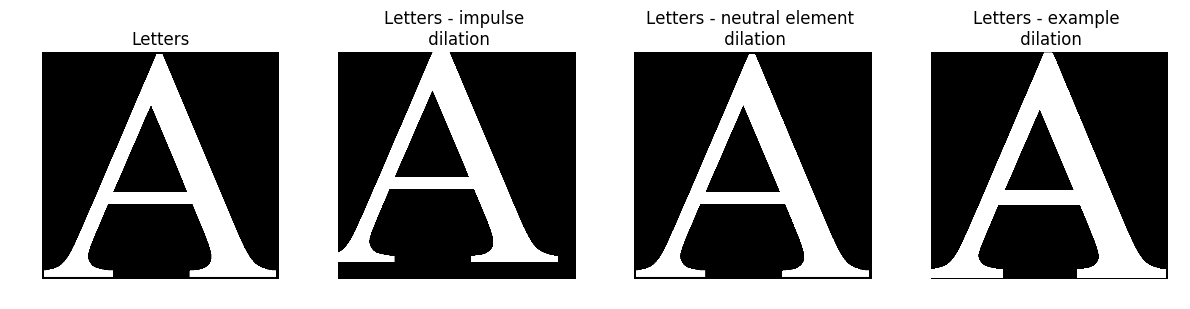

In [5]:
selems = []
s = np.zeros((101,101))
s[0,0] = 1
selems.append( s )   # 1. impulse
selems.append( np.array([[0,0,0],[0,1,0],[0,0,0]]) )   # 2. neutral element
selems.append( morphology.square(10) )   # 3. example

titles = ["impulse \n dilation", "neutral element \n dilation", "example \n dilation"]

for image, imTitle in zip(images,imTitles):
    fig,axes = plt.subplots(1,4, figsize=(12,6))
    axes = axes.ravel()
    axes[0].imshow(image, cmap=cm.gray)
    axes[0].set_axis_off()
    axes[0].set_title(imTitle)    
    for selem, ax, title in zip(selems, axes[1:], titles):
        ax.imshow(morphology.binary_dilation(image, selem=selem), cmap=cm.gray)
        ax.set_axis_off()
        ax.set_title(imTitle + " - " + title)
    fig.tight_layout()
    plt.show()    

## 12.1.3 opening and Closing

**Closing** = Dilation + Erosion. Closes small white ares (less white).

**opening** = Erosion + Dilation. opens small white ares (more white).

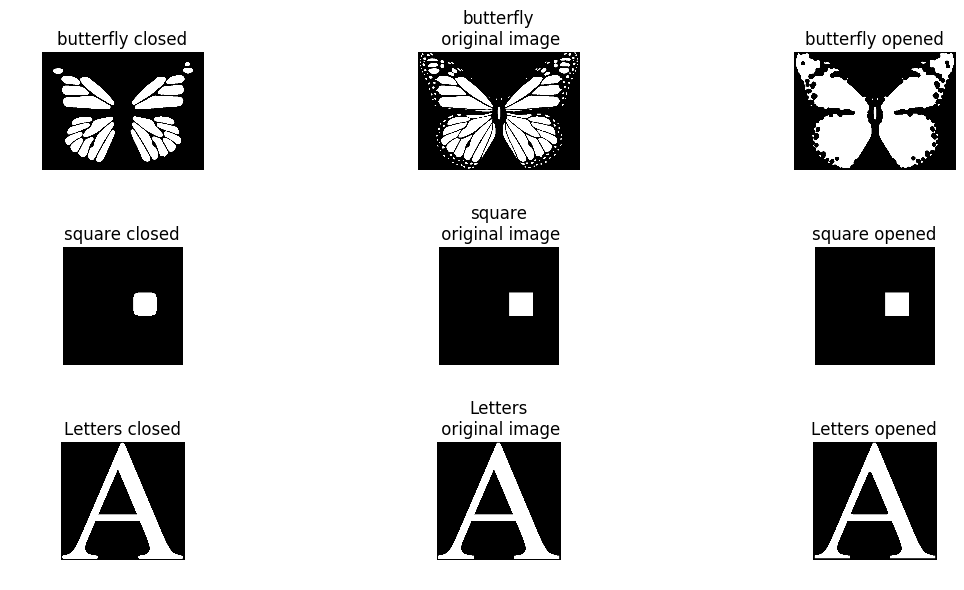

In [6]:
fig, axes= plt.subplots(len(images), 3, figsize=(12,6))
   
def close_open_plot(im, selems, axes):
    '''quick function to close and open a binary image and plot it into the given axes'''
    selem_open, selem_close = selems
    ax_close, ax_original, ax_open = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()    
    
    ax_close.imshow(morphology.binary_opening(im,selem=selem_close), cmap=cm.gray)
    ax_close.set_axis_off()
    
    ax_open.imshow(morphology.binary_closing(im,selem=selem_open), cmap=cm.gray)
    ax_open.set_axis_off()
    
    return ax_close, ax_original, ax_open

selem_open = morphology.disk(10)
selem_close = morphology.disk(10)
        
for k in range(len(images)):
    im = images[k]
    ax_close, ax_original, ax_open = close_open_plot(im, (selem_open, selem_close), axes[k,:])
    
    ax_original.set_title(imTitles[k] + "\n original image")
    ax_close.set_title(imTitles[k] + " closed")
    ax_open.set_title(imTitles[k] + " opened")
    
fig.tight_layout()
plt.show()

## 12.1.4 Border Extraction

\begin{align}
\mathrm{Border} \left\{ G \right\}= G / (G \ominus S)
\end{align}

```python
from skimage import morphology
selem = morphology.disk(1)
border = np.logical_not(morphology.erosion(im, selem=selem))
```
1. Erosion results in shrinking the object and yields the interior of the point set. 
2. By calculating the difference from the original binary image, one obtains exactly the border points.
3. A border of size 1 can be achieved by a disk with radius 1 or a cross. This corresponds to the 4 connected neighborhood. If you want a 8 connected neighborhood, a square of size 3x3 can be used

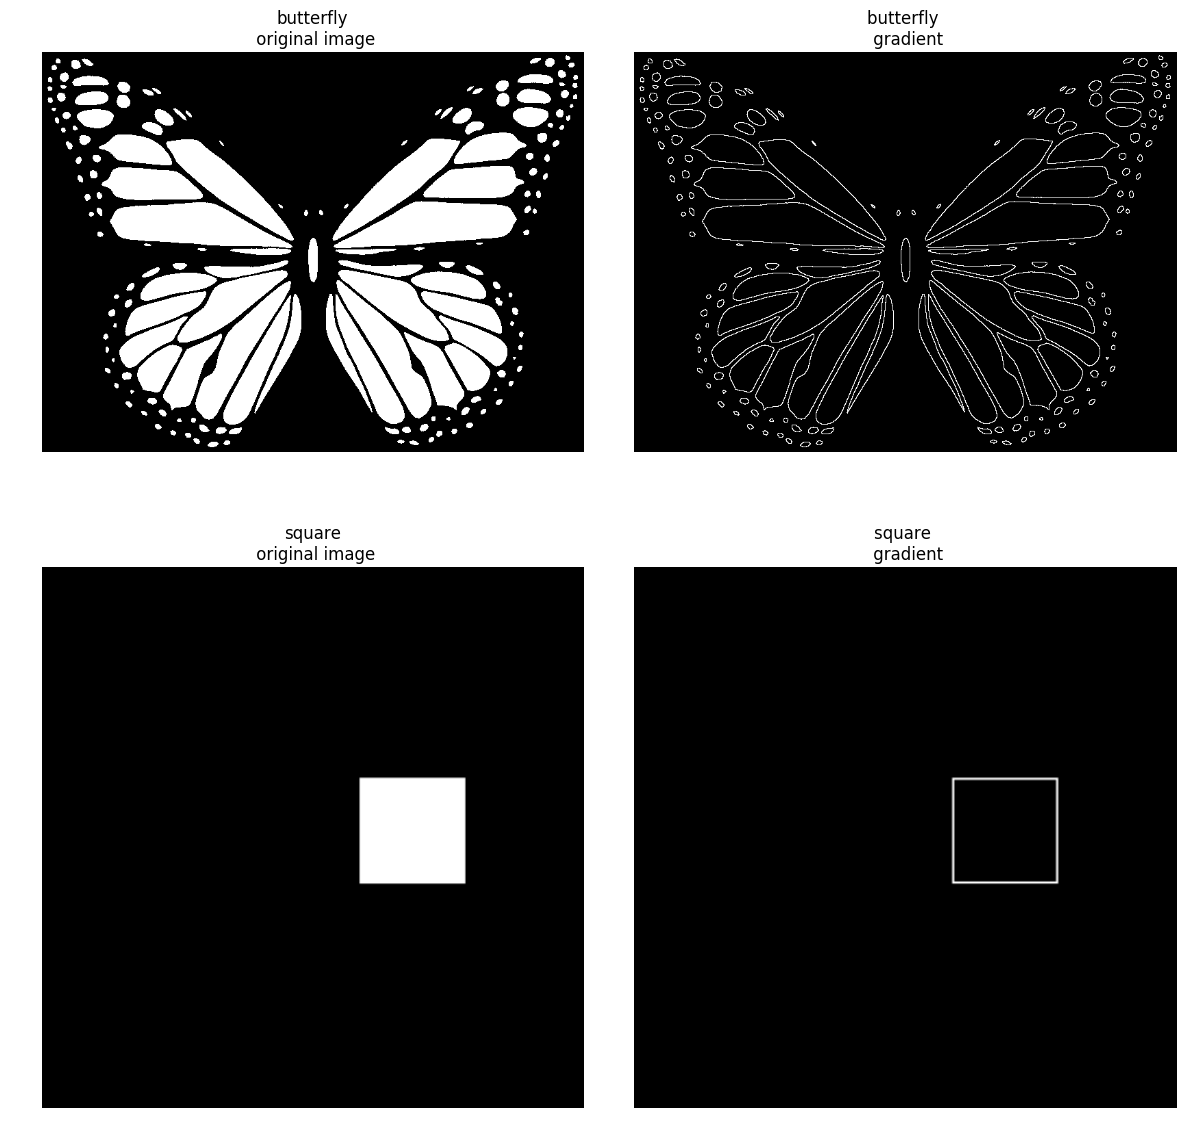

In [8]:
fig, axes = plt.subplots(len(images), 2, figsize=(12,12))
   
def gradient_plot(im, selem, axes):
    '''quick function to close and open a binary image and plot it into the given axes'''
    ax_original, ax_gradient = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()    
    
    ax_gradient.imshow(np.logical_and(im, np.logical_not(morphology.erosion(im, selem=selem))), cmap=cm.gray)
    ax_gradient.set_axis_off()
    
    return ax_original, ax_gradient
        
selem = morphology.square(3)
for k in range(len(images)):
    im = images[k]
    ax_original, ax_gradient = gradient_plot(im, selem, axes[k,:])
    
    ax_original.set_title(imTitles[k] + "\n original image")
    ax_gradient.set_title(imTitles[k] + " \n gradient")
    
fig.tight_layout()
plt.show()

## 12.1.6 Connected Component Analysis

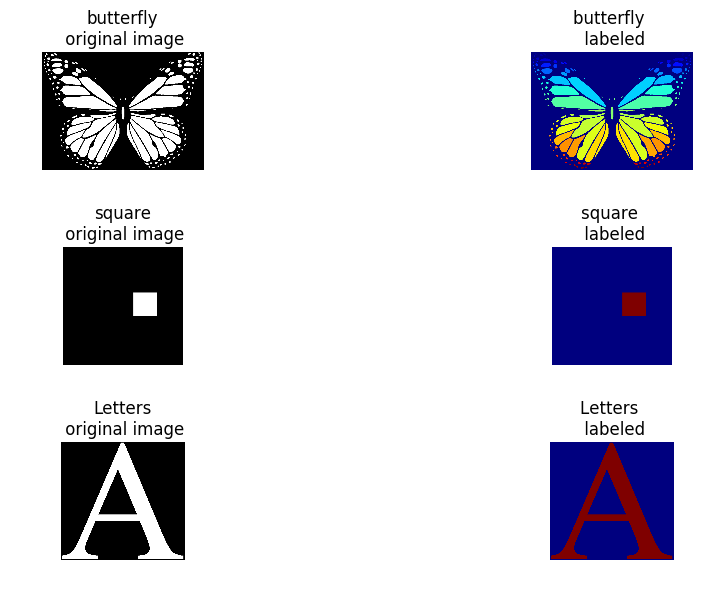

In [13]:
fig, axes = plt.subplots(len(images), 2, figsize=(12,6))
   
def label_plot(im, axes):
    '''quick function to close and open a binary image and plot it into the given axes'''
    ax_original, ax_label = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()    
    
    im = im.astype(np.int8)
    im[im==1] = 255
    markers = morphology.label(im, background = 0)
    ax_label.imshow(markers, cmap=cm.jet)
    ax_label.set_axis_off()
    
    return ax_original, ax_label
        
selem = morphology.square(3)
for k in range(len(images)):
    im = images[k]
    ax_original, ax_label = label_plot(im, axes[k,:])
    
    ax_original.set_title(imTitles[k] + "\n original image")
    ax_label.set_title(imTitles[k] + " \n labeled")
    
fig.tight_layout()
plt.show()

## 12.1.8 Skeletonization or medial axis transformation

In Beyerer et al. "Machine Vision" skeletonization describes recursively subtracting erosions of the point set $G$ from itself until there is an empty set. In `skimge` this is achieved by `morphology.medial_axis`

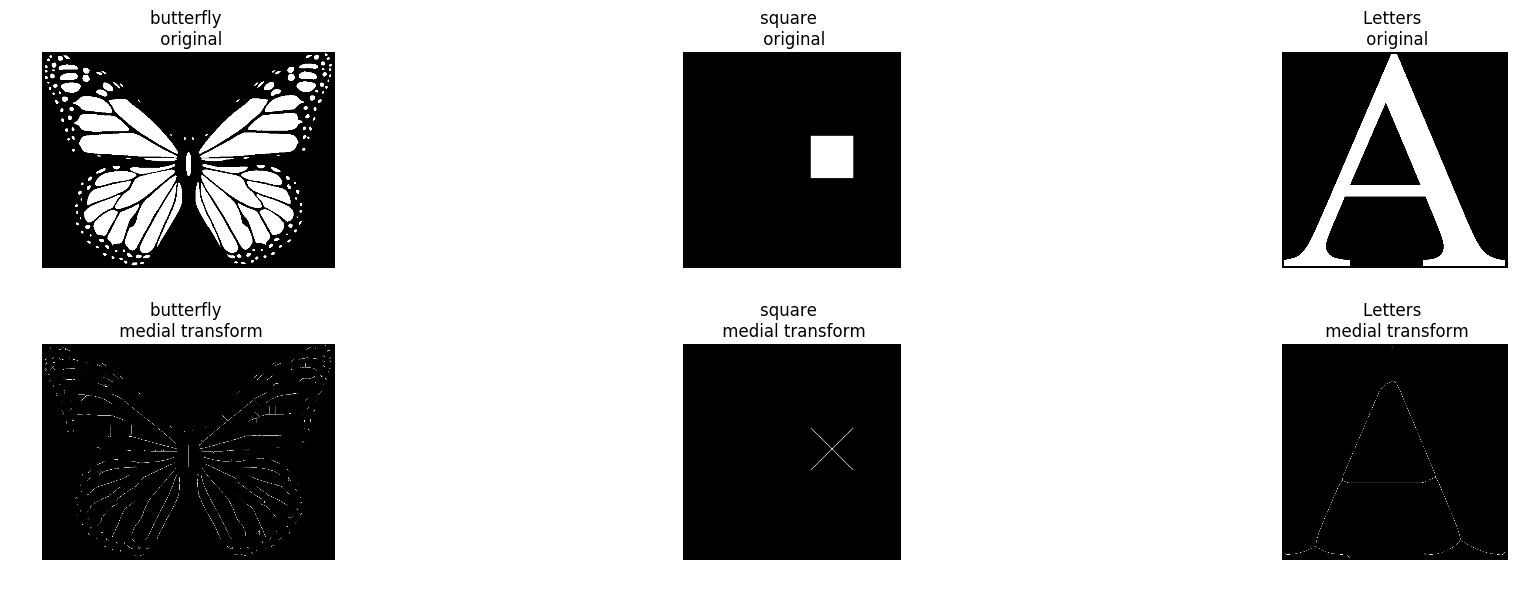

In [18]:
def medial_plot(im, axes):
    ax_original, ax_med = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()
    
    ax_med.imshow(morphology.medial_axis(im), cmap=cm.gray)
    ax_med.set_axis_off()
    
    return ax_original,ax_med


fig, axes = plt.subplots(2, len(images), figsize=(20,6))
for k in range(len(images)):
    im = images[k]
    
    ax_original, ax_med = medial_plot(im, axes[:,k])
    ax_original.set_title(imTitles[k] + " \n original")
    ax_med.set_title(imTitles[k] + " \n medial transform")
    
fig.tight_layout()
plt.show()

### 12.1.9 Pruning

Todo

## 12.2 Grayscale Morphology

### 12.2.2 opening and Closing of gray-scale images

1. Gray-scale opening and closing is similar to median filtering and therefore suitable for noise reduction.

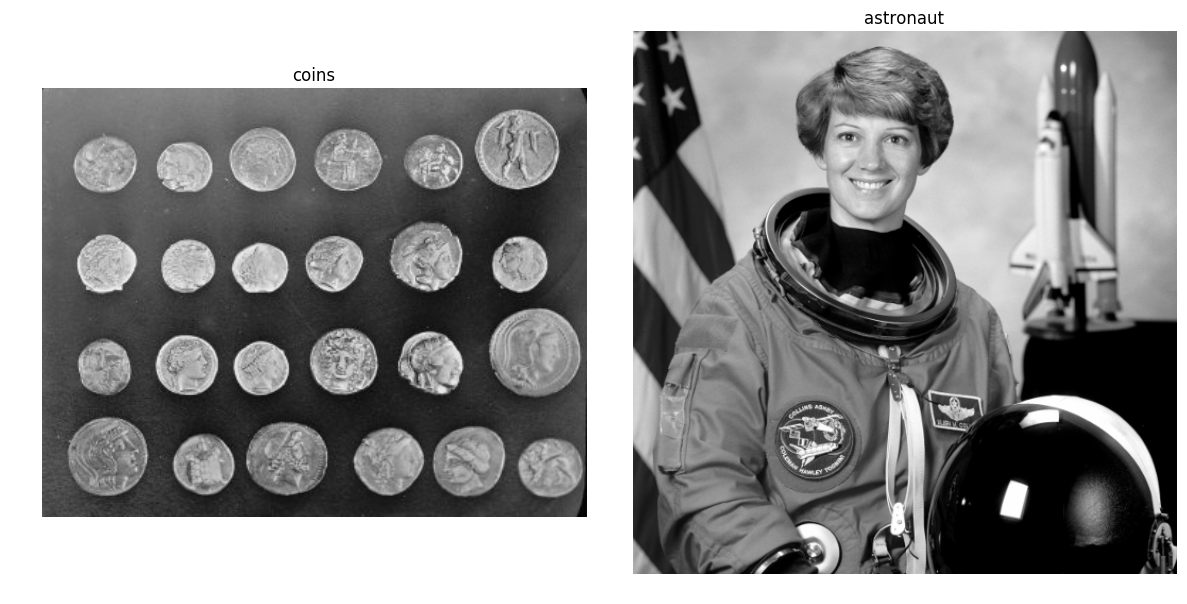

In [3]:
imTitles = ["coins", "astronaut"]

images = []
images.append(color.rgb2gray(data.coins()))
images.append(color.rgb2gray(data.astronaut()))
              
fig, axes = plt.subplots(1, len(images), figsize=(12,6))

for im, ax, tit in zip(images, axes, imTitles):
    ax.imshow(im, cmap=cm.gray)
    ax.set_axis_off()
    ax.set_title(tit)

fig.tight_layout()
plt.show()


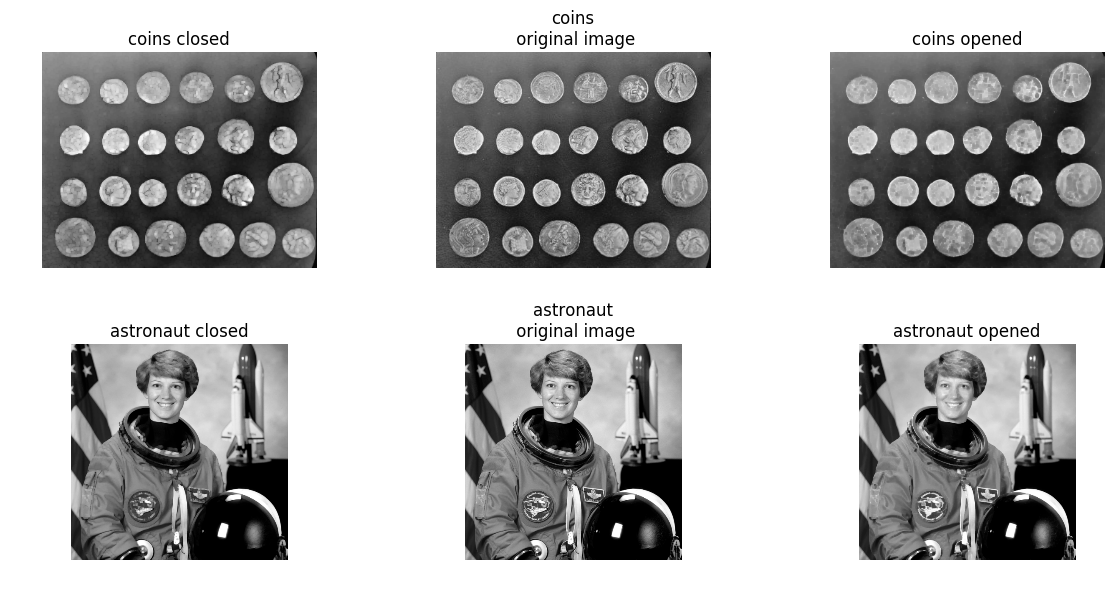

In [4]:
def close_open_plot(im, selems, axes):
    '''quick function to close and open a GRAY-SCALE image and plot it into the given axes'''
    selem_open, selem_close = selems
    ax_close, ax_original, ax_open = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()    
    
    ax_close.imshow(morphology.opening(im,selem=selem_close), cmap=cm.gray)
    ax_close.set_axis_off()
    
    ax_open.imshow(morphology.closing(im,selem=selem_open), cmap=cm.gray)
    ax_open.set_axis_off()
    
    return ax_close, ax_original, ax_open
    
selem_open = morphology.square(3)
selem_close = morphology.square(3)
  
fig,axes = plt.subplots(len(images), 3, figsize=(12,6))
for k in range(len(images)):
    im = images[k]
    ax_close, ax_original, ax_open = close_open_plot(im, (selem_open, selem_close), axes[k,:])
    
    ax_original.set_title(imTitles[k] + "\n original image")
    ax_close.set_title(imTitles[k] + " closed")
    ax_open.set_title(imTitles[k] + " opened")
    
fig.tight_layout()
plt.show()

## open and White top-hat


The open and White top-hat operators are suitable for calculating narrow extrema of the image like dark or bright lines
1. The white top-hat operator is defined as follows
\begin{align}
g - (g - \circ s)
\end{align}

2. The open top-hat operator is defined as follows
\begin{align}
(g \bullet s) -g
\end{align}

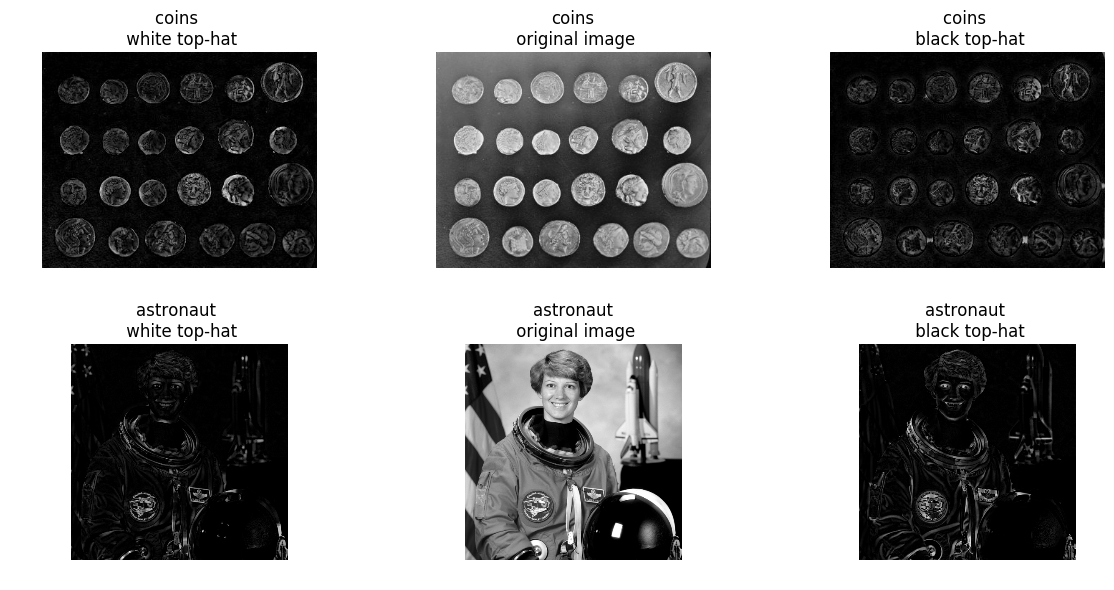

In [5]:
def white_black_plot(im, selems, axes):
    '''quick function to white and black a GRAY-SCALE image and plot it into the given axes'''
    selem_black, selem_white = selems
    ax_white, ax_original, ax_black = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()    
    
    ax_white.imshow(morphology.white_tophat(im,selem=selem_white), cmap=cm.gray)
    ax_white.set_axis_off()
    
    ax_black.imshow(morphology.black_tophat(im,selem=selem_black), cmap=cm.gray)
    ax_black.set_axis_off()
    
    return ax_white, ax_original, ax_black
    
selem_black = morphology.disk(5)
selem_white = morphology.disk(5)
  
fig,axes = plt.subplots(len(images), 3, figsize=(12,6))
for k in range(len(images)):
    im = images[k]
    ax_white, ax_original, ax_black = white_black_plot(im, (selem_black, selem_white), axes[k,:])    
    ax_original.set_title(imTitles[k] + "\n original image")
    ax_white.set_title(imTitles[k] + " \n white top-hat")
    ax_black.set_title(imTitles[k] + " \n black top-hat")
    
fig.tight_layout()
plt.show()

### 12.2.4 Edge Detection

1. Beucher gradient as an approximation of the gradient of an image
\begin{align}
    | \mathrm{grad} g | + \mathrm{const.} = (g \oplus s) - (g \ominus s).   
\end{align}
In words: dilate g with s, erode g with s, then subtract the first from the second.

2. morphological laplace operator as an approximation of the second derivative.
\begin{align}
    \Delta g = \mathrm{div} ( \mathrm{grad} g ) \simeq (g \oplus s) + (g \ominus s) - 2g.
\end{align}

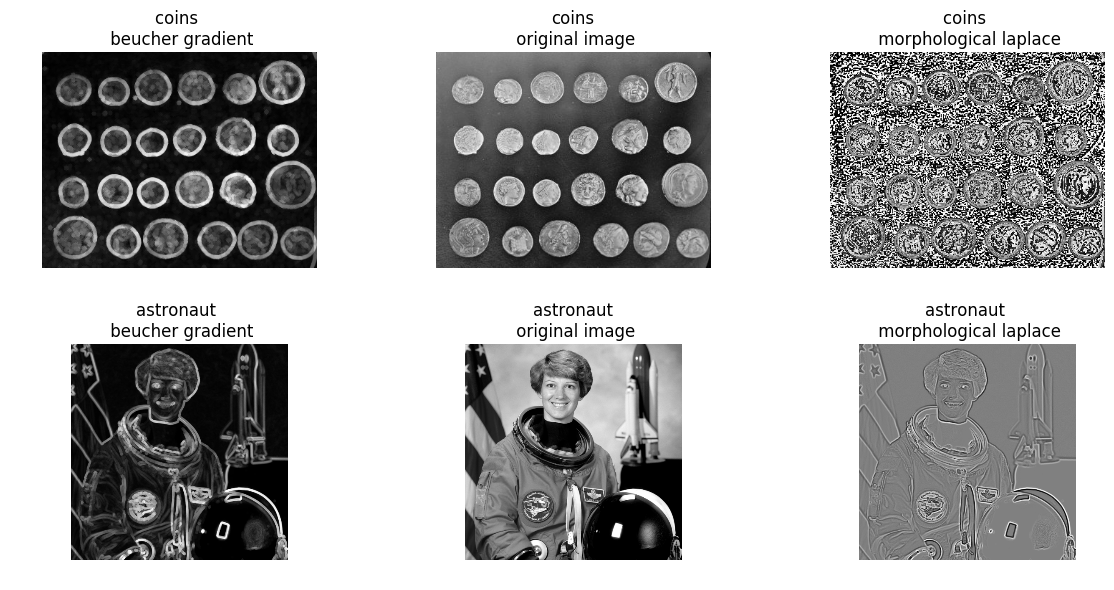

In [15]:
def beucher(im, selems):
    selem_dil, selem_er = selems
    return (morphology.dilation(im, selem=selem_dil) - morphology.erosion(im, selem=selem_er))

def laplace(im, selems):
    selem_dil, selem_er = selems
    return ((morphology.dilation(im, selem=selem_dil) + morphology.erosion(im, selem=selem_er)) - 2* im)


def morph_grad_plot(im, selems, axes):
    '''quick function to calculate the beucher gradient and the morphological laplace operator of 
    a GRAY-SCALE image and plot it into the given axes'''
    ax_beucher, ax_original, ax_delta = axes
    
    ax_original.imshow(im, cmap=cm.gray)
    ax_original.set_axis_off()    
    
    ax_beucher.imshow(beucher(im, selems=selems), cmap=cm.gray)
    ax_beucher.set_axis_off()
    
    ax_delta.imshow(laplace(im, selems=selems), cmap=cm.gray)
    ax_delta.set_axis_off()
    
    return ax_beucher, ax_original, ax_delta
    
selem_delta = morphology.star(2)
selem_beucher = morphology.star(2)
  
fig,axes = plt.subplots(len(images), 3, figsize=(12,6))
for k in range(len(images)):
    im = images[k]
    ax_beucher, ax_original, ax_delta = morph_grad_plot(im, (selem_delta, selem_beucher), axes[k,:])    
    ax_original.set_title(imTitles[k] + "\n original image")
    ax_beucher.set_title(imTitles[k] + " \n beucher gradient")
    ax_delta.set_title(imTitles[k] + " \n morphological laplace")
    
fig.tight_layout()
plt.show()